# K-Mean 分群

In [1]:
p9.6 <- read.csv("https://raw.githubusercontent.com/LiShingHan/DataScience/main/DataSet/p9.6.csv")

In [2]:
p9.6

x,y
<int>,<int>
2,4
2,6
5,6
4,7
8,3
6,6
5,2
5,7
6,3


# 分兩群

In [3]:
km <- kmeans(p9.6, centers=2, nstart = 1) 

# 可試著換 nstart ex: nstart = 1

In [4]:
km

K-means clustering with 2 clusters of sizes 3, 7

Cluster means:
         x        y
1 6.333333 2.666667
2 4.000000 5.714286

Clustering vector:
 [1] 2 2 2 2 1 2 1 2 1 2

Within cluster sum of squares by cluster:
[1]  5.333333 23.428571
 (between_SS / total_SS =  51.8 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

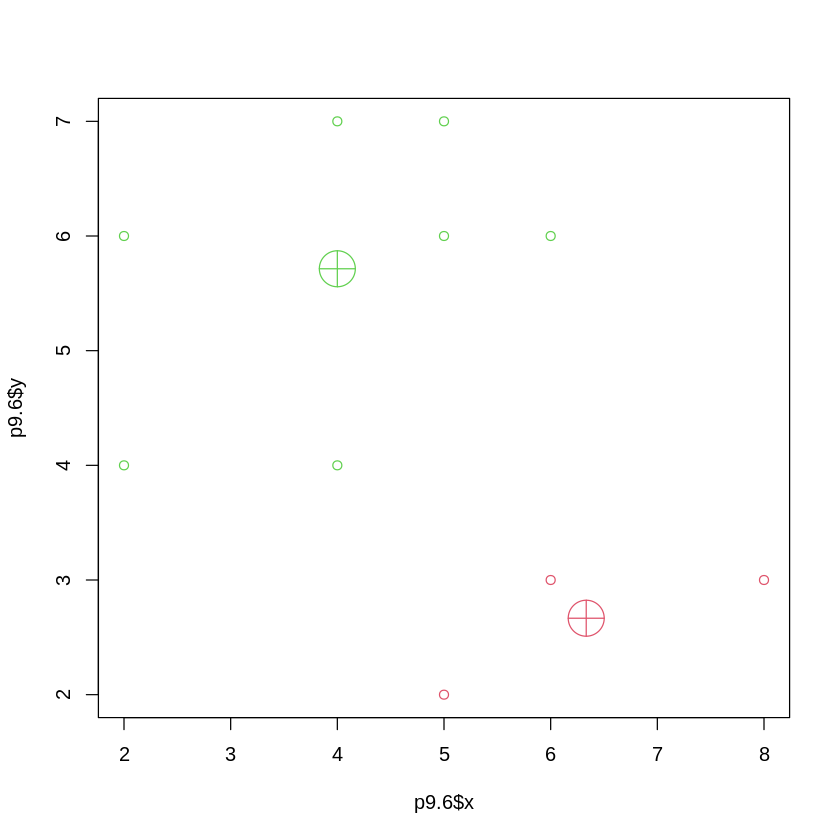

In [5]:
plot(p9.6$x, p9.6$y,type="n")
points(x=p9.6$x, y=p9.6$y, col=km$cluster+1)
points(km$centers, col = 2:3, pch = 10, cex = 4)

In [6]:
install.packages("isoband")
library(isoband)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



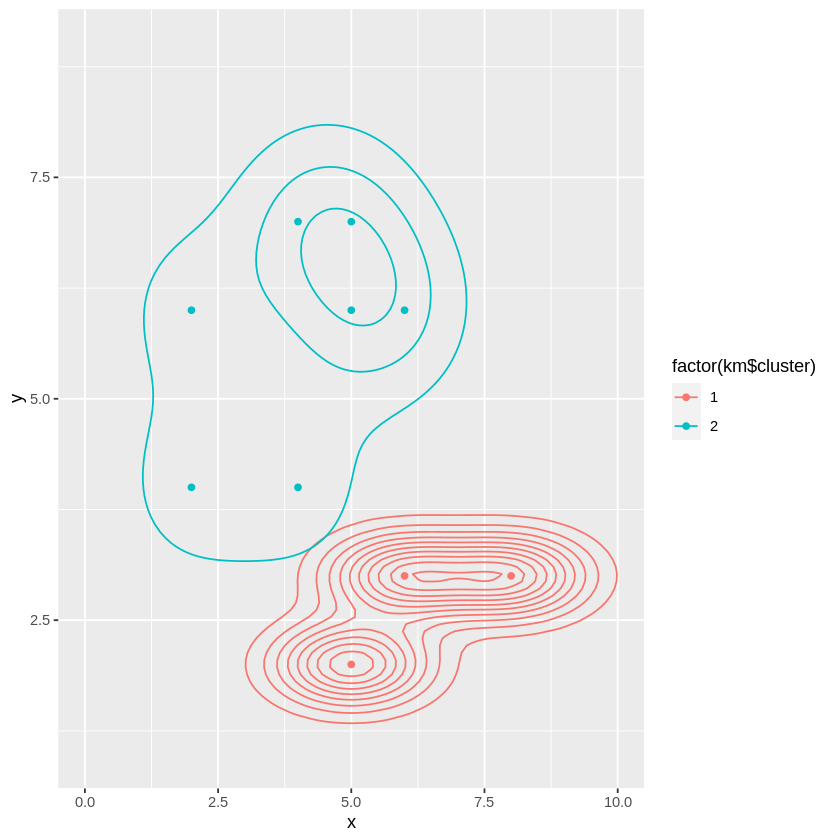

In [7]:
p = ggplot(p9.6, aes(x = x, y = y)) +
geom_point(aes(color = factor(km$cluster))) +
stat_density2d(aes(color = factor(km$cluster)))

p + xlim(0,10)  + ylim(1,9)

# 分三群

In [8]:
km <- kmeans(p9.6, centers=3) 

In [9]:
km

K-means clustering with 3 clusters of sizes 4, 3, 3

Cluster means:
         x        y
1 5.000000 6.500000
2 2.666667 4.666667
3 6.333333 2.666667

Clustering vector:
 [1] 2 2 1 1 3 1 3 1 3 2

Within cluster sum of squares by cluster:
[1] 3.000000 5.333333 5.333333
 (between_SS / total_SS =  77.1 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

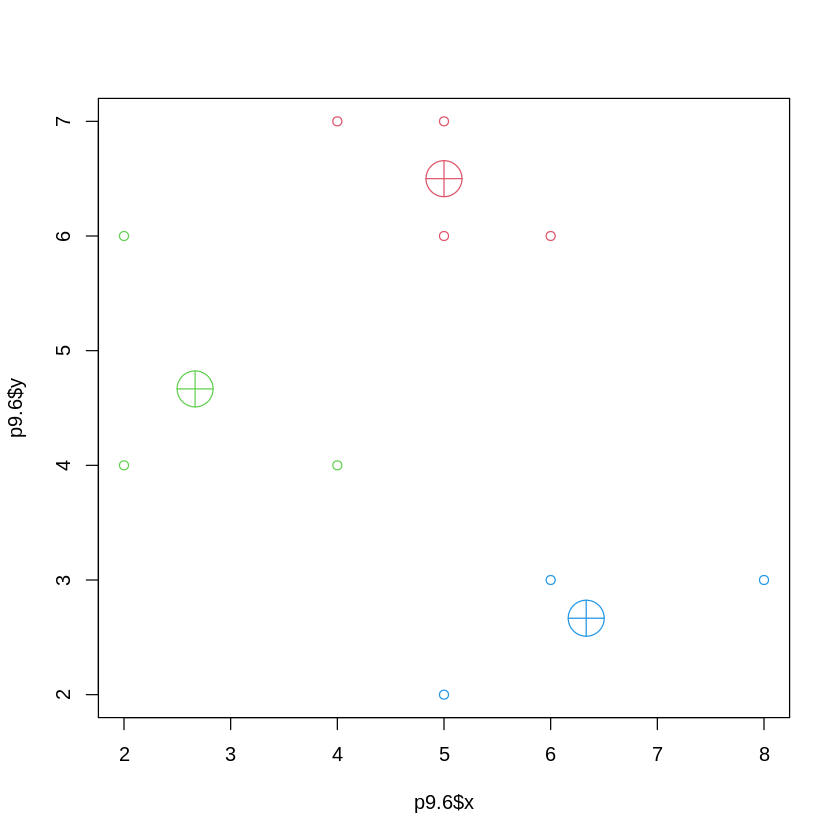

In [10]:
plot(p9.6$x, p9.6$y,type="n")
points(x=p9.6$x, y=p9.6$y, col=km$cluster+1)
points(km$centers, col = 2:4, pch = 10, cex = 4)

In [11]:
install.packages("isoband")
library(isoband)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



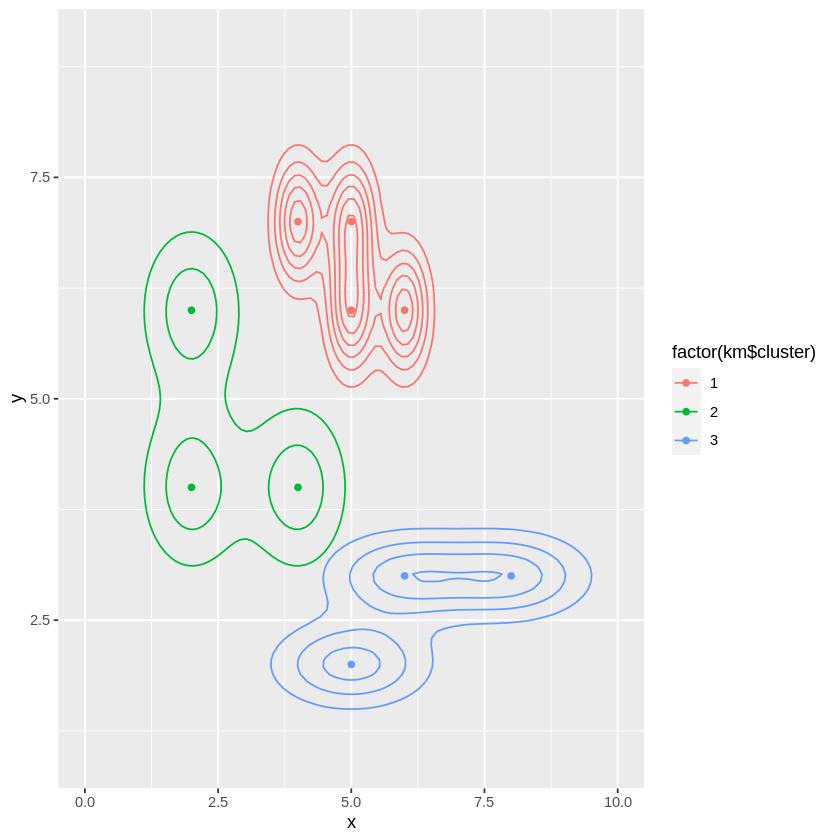

In [12]:
p = ggplot(p9.6, aes(x = x, y = y)) +
geom_point(aes(color = factor(km$cluster))) +
stat_density2d(aes(color = factor(km$cluster)))

p + xlim(0,10)  + ylim(1,9)

# 分群的最佳數目(Optimal number of clusters)
### Elbow Method

In [13]:
library(purrr)

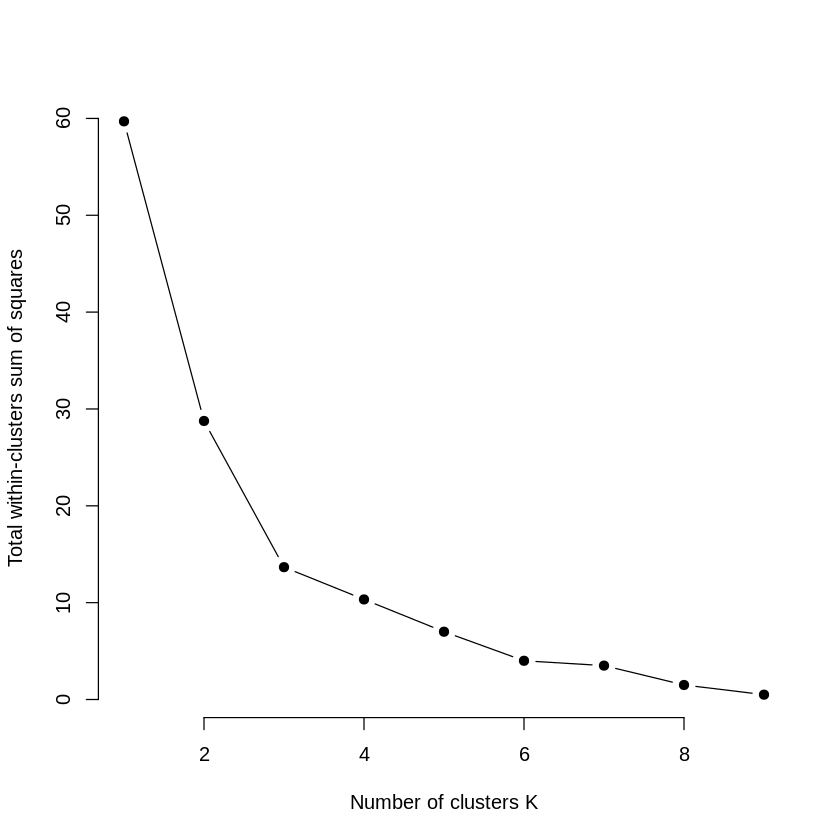

In [14]:
# function to compute total within-cluster sum of square 
wss <- function(k) {
  kmeans(p9.6, centers=k)$tot.withinss
}

# Compute and plot wss for k = 1 to k = 15
k.values <- 1:9

# extract wss for 2-15 clusters
wss_values <- map_dbl(k.values, wss)

plot(k.values, wss_values,
       type="b", pch = 19, frame = FALSE, 
       xlab="Number of clusters K",
       ylab="Total within-clusters sum of squares")